<a href="https://colab.research.google.com/github/SINDHUSITA/Customer-Segmentation/blob/master/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [9]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[1:]
X.replace(to_replace='Male', value=0,inplace=True)
X.replace(to_replace='Female',value=1,inplace=True)
X.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76


[962953.5276381909, 383476.95403111744, 269725.44109381456, 193818.80336538464, 155012.57717104914, 120936.97100457978, 101626.34982515275, 84449.74198307731, 75350.42526070421, 67709.91041902732]


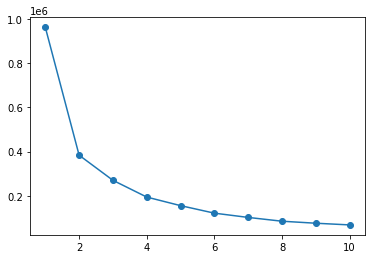

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    cluster_alg = KMeans(n_clusters = i, init='k-means++')
    cluster_alg.fit(X)
    wcss.append(cluster_alg.inertia_)
print(wcss)
clusters = np.arange(1,11,1)
plt.plot(clusters, wcss)
plt.scatter(clusters, wcss)
plt.show()

In [31]:
cluster_alg = KMeans(n_clusters = 5, init='k-means++')
y_kmeans = cluster_alg.fit_predict(X)
print(y_kmeans)


[2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 0 4 0 4 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


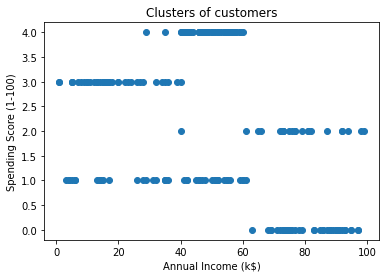

In [42]:
plt.scatter(X.iloc[:,-1].values, y_kmeans);
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()